In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import zipfile
import kaggle
import os

In [10]:
# Ensure the Kaggle API credentials are set
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')

# Define the Kaggle dataset and download path
dataset = 'robikscube/zillow-home-value-index'  # Replace with your dataset name
download_path = '../data'  # Replace with your desired download path

In [11]:
# Create download directory if it doesn't exist
if not os.path.exists(download_path):
    os.makedirs(download_path)

In [12]:
# Download the latest dataset from Kaggle
kaggle.api.dataset_download_files(dataset, path=download_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/robikscube/zillow-home-value-index


In [13]:
# Optionally, unzip the dataset if it's downloaded as a zip file
for file in os.listdir(download_path):
    if file.endswith('.zip'):
        with zipfile.ZipFile(os.path.join(download_path, file), 'r') as zip_ref:
            zip_ref.extractall(download_path)
        os.remove(os.path.join(download_path, file))  # Remove the zip file after extraction

In [16]:
# Load the dataset into a DataFrame
file_name = 'ZHVI.csv'  # Replace with the actual file name after extraction
df = pd.read_csv(os.path.join(download_path, file_name))

# Display the DataFrame
df.head()

,Unnamed: 0,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
0,2000-01-01,125119.607358,193143.064540,107596.267297,153038.753578,170064.024480,112639.074920,118082.448863,197787.916145,135480.962119,...,85572.294787,97590.186879,90287.224937,148516.132021,NaN,82474.973293,109195.394811,117554.815232,92105.258314,107545.808841
1,2000-02-01,125443.370874,193792.276029,107829.330827,153583.721872,170522.457414,112700.285903,118147.485856,198448.264202,135726.357971,...,85616.475342,97704.570097,90304.948490,148747.189038,NaN,82508.994429,108963.390672,117742.731463,92281.267139,107611.529086
2,2000-03-01,125786.636202,194668.870513,108111.850284,154108.341740,170959.883196,112729.974189,118385.590769,199233.974188,136042.186939,...,85696.860055,97875.820342,90409.365665,149034.875822,NaN,82667.577843,108638.718046,117916.895248,92447.426847,107711.197321
3,2000-04-01,126435.293507,196571.695764,108686.139673,155236.656459,171929.013984,112877.319783,118859.894819,200781.491550,136687.091491,...,85896.623421,98267.259964,90565.462073,149692.808979,NaN,82956.349925,108201.094167,118187.250291,92806.327270,108004.276576
4,2000-05-01,127061.501084,198783.443474,109305.448893,156404.058856,172916.966624,112972.743101,119559.354865,202456.602882,137418.099921,...,86162.114476,98772.886507,90800.763434,150443.211028,NaN,83344.215739,108019.029845,118324.349897,93202.856819,108451.149560


In [23]:
df.dtypes

Unnamed: 0                   object
Virginia                    float64
California                  float64
Florida                     float64
New York                    float64
New Jersey                  float64
Texas                       float64
Michigan                    float64
Massachusetts               float64
Arizona                     float64
Washington                  float64
Colorado                    float64
Illinois                    float64
the District of Columbia    float64
Nevada                      float64
Hawaii                      float64
New Hampshire               float64
Utah                        float64
Georgia                     float64
Montana                     float64
Minnesota                   float64
Louisiana                   float64
Maryland                    float64
Pennsylvania                float64
South Carolina              float64
North Carolina              float64
Vermont                     float64
Tennessee                   

In [28]:
import itertools
from itertools import cycle
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [31]:

# Ensure all columns are numeric
print(df.dtypes)

# Check for any non-numeric data
for col in df.columns:
    print(f"{col} - Non-numeric values: {df[col].apply(lambda x: isinstance(x, (int, float))).sum() != len(df[col])}")

# Set up color cycle
color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])


Unnamed: 0                   object
Virginia                    float64
California                  float64
Florida                     float64
New York                    float64
New Jersey                  float64
Texas                       float64
Michigan                    float64
Massachusetts               float64
Arizona                     float64
Washington                  float64
Colorado                    float64
Illinois                    float64
the District of Columbia    float64
Nevada                      float64
Hawaii                      float64
New Hampshire               float64
Utah                        float64
Georgia                     float64
Montana                     float64
Minnesota                   float64
Louisiana                   float64
Maryland                    float64
Pennsylvania                float64
South Carolina              float64
North Carolina              float64
Vermont                     float64
Tennessee                   

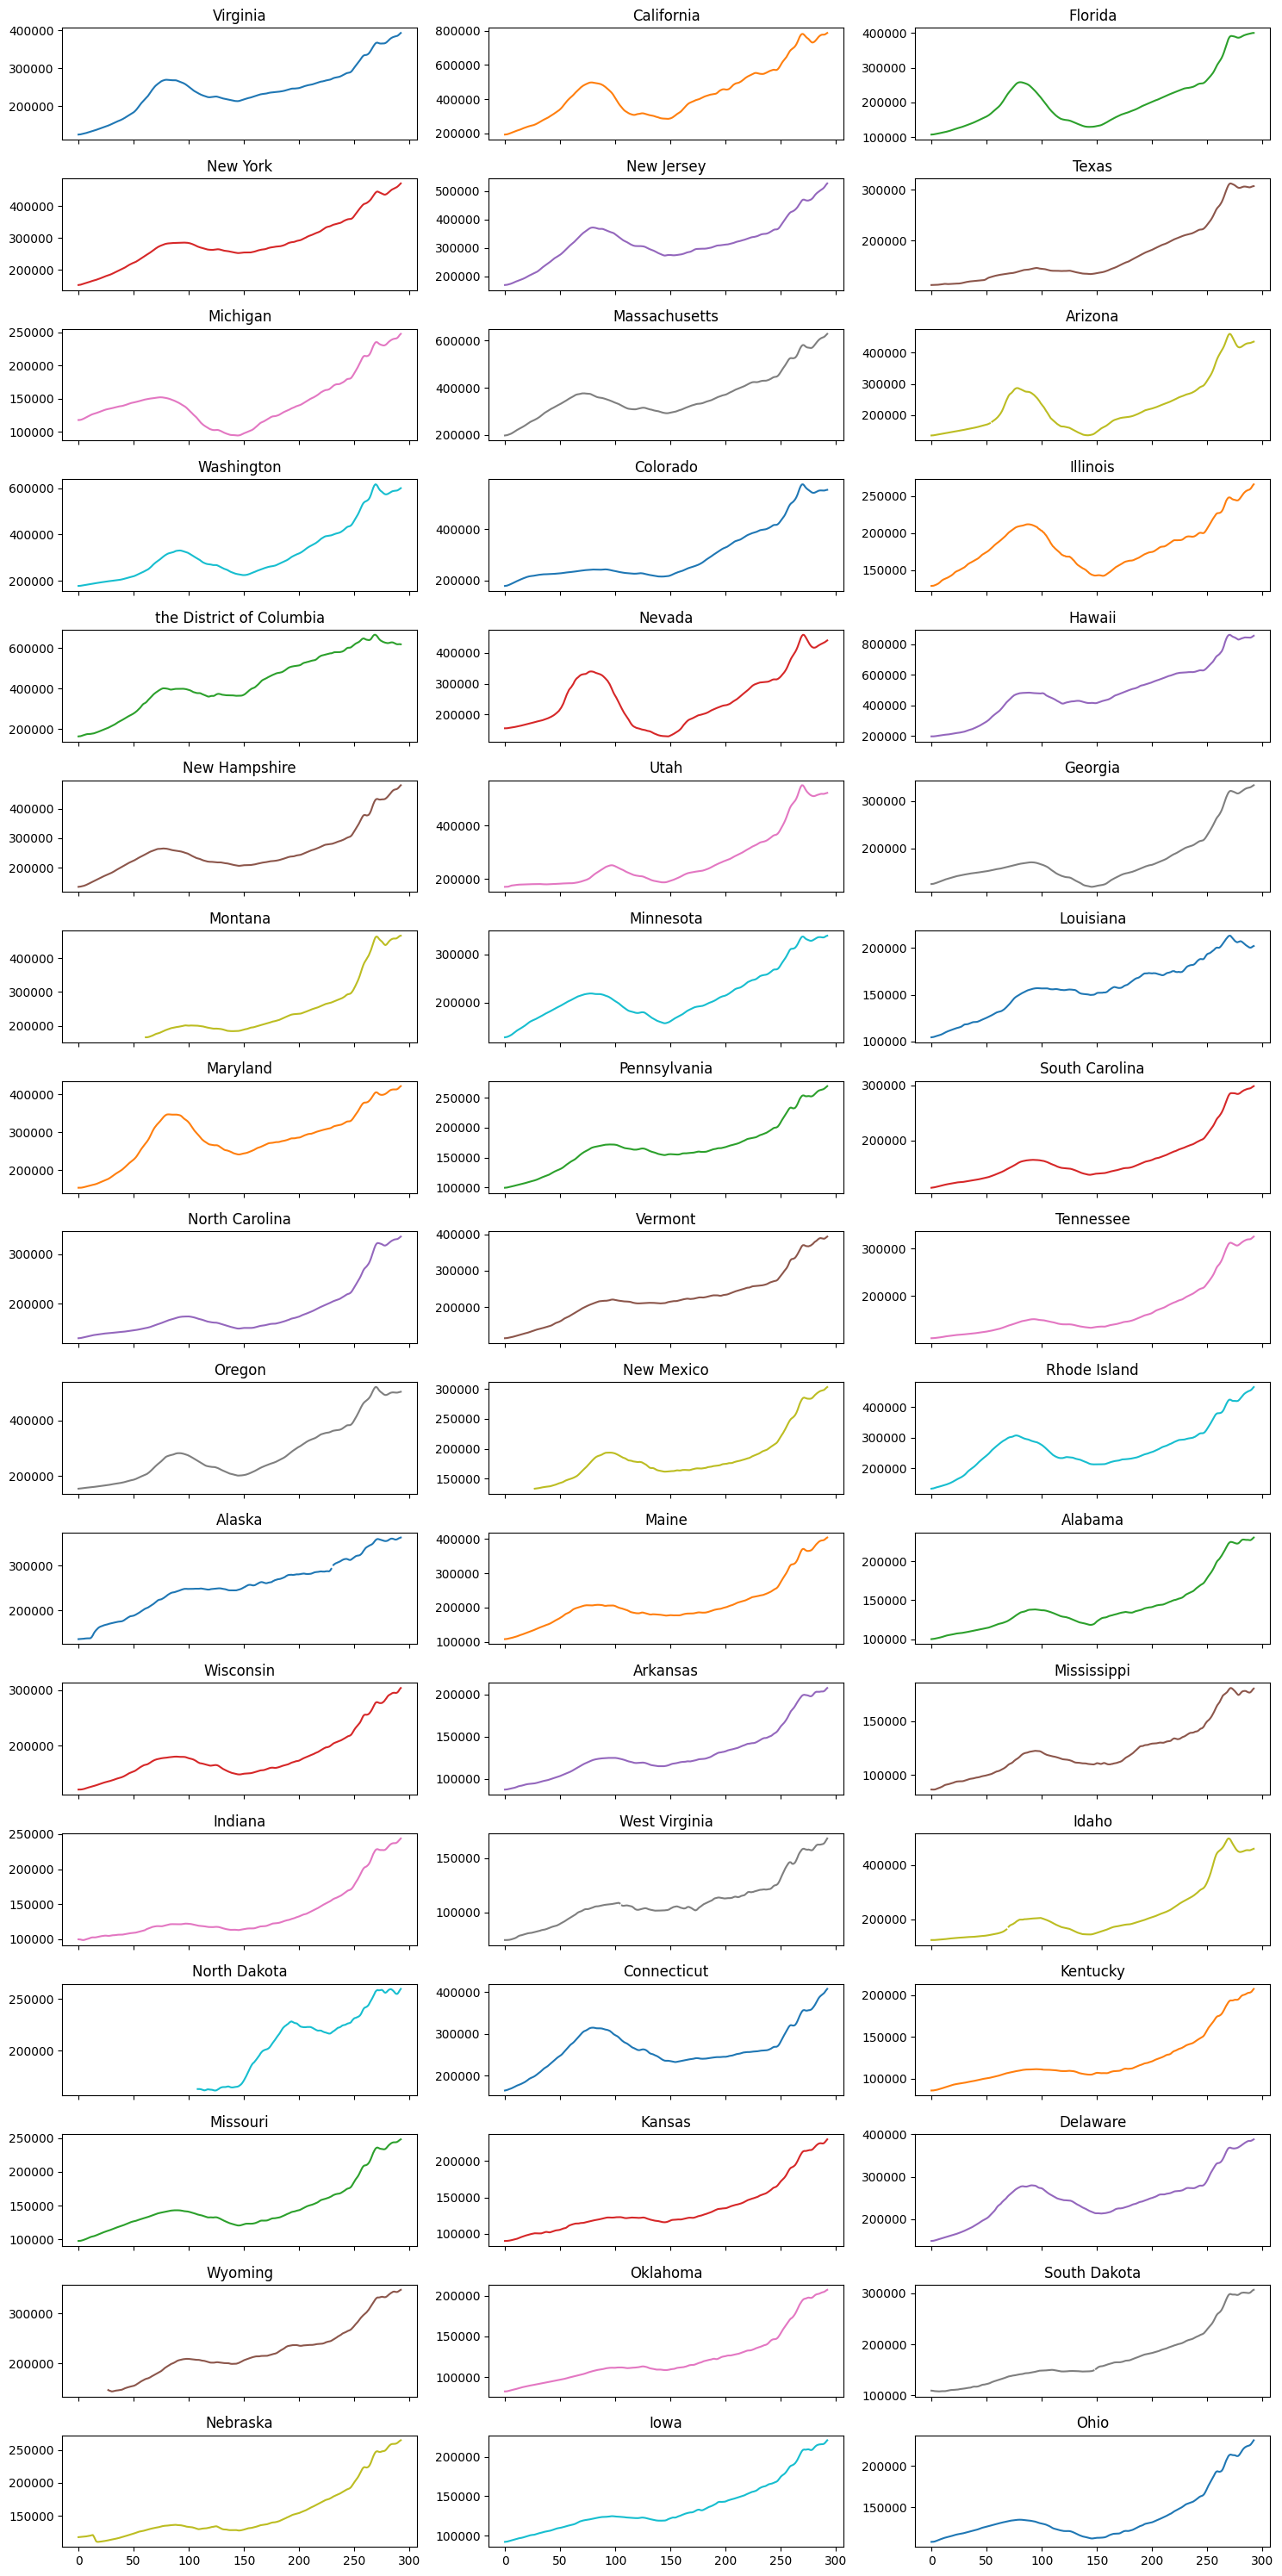

In [32]:

# Create subplots
fig, axs = plt.subplots(17, 3, figsize=(15, 30), sharex=True, sharey=False)
axs = axs.flatten()

# Plot each column
for i, state in enumerate(df.columns[1:]):
    if pd.api.types.is_numeric_dtype(df[state]):
        df[state].plot(title=state, color=next(color_cycle), ax=axs[i])
    else:
        print(f"Skipping non-numeric column: {state}")

plt.tight_layout()
plt.show()